# Lab 1 – Graph Generator
Name: Ngô Văn Trung Nguyên

StudentID: 20127054

---

## Self evaluation

|No.|Criteria|Evaluation rate (%)|
|--------|--------|---------|
|1| Install NetworkX successfully|100%|
|2| Generate at least 8 types of graphs with a large enough size |100%|  
|3| Visualize the generated graph in many ways and indicate their properties |100%| 
|4| Draw the distribution |100%| 
|5| Full and detailed report of the implementation process, source code. Clear presentation, reasonable layout |100%| 



---

## NetworkX library report

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks. It is used to study large complex networks represented in form of graphs with nodes and edges. Using networkx we can load and store complex networks. We can generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms and draw networks. 

Installation: `pip install networkx`

Creating Nodes

- Add one node at a time: `add_node()`
- Add a list of nodes: `add_nodes_from()`

Creating Edges

- Add one edge at a time: `add_edge()`
- Add a list of edges: `add_edges_from()`

Removing Nodes and Edges:
- `remove_node()` and `remove_nodes_from()`
- `remove_edge()` and `remove_edges_from()`

Some basic properties:
- `nodes()`, `edges()`, `degree()`, ...

---

## Import librabries

In [1]:
import networkx as nx
from networkx.algorithms import bipartite 
import matplotlib.pyplot as plt
import numpy as np

---

## Some helper functions

In [2]:
def print_properties(G):
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

    if nx.is_directed(G) is False:
        if nx.number_connected_components(G) > 1:
            print("Many connected components, no diameter")
        else:
            print("Diameter:", nx.diameter(G))
        print("Number of connected components:", nx.number_connected_components(G))
        print("Average degree: ", np.array([d for n, d in G.degree()]).sum()/nx.number_of_nodes(G))
    else:
        print("Average in-degree: ", np.array([d for n, d in G.in_degree()]).sum()/nx.number_of_nodes(G))
        print("Average out-degree: ", np.array([d for n, d in G.out_degree()]).sum()/nx.number_of_nodes(G))
        print("Average total-degree: ", np.array([d for n, d in G.degree()]).sum()/nx.number_of_nodes(G))

In [3]:
def draw_with_layout(G, layout):
    if layout=='circular_layout':
        pos = nx.circular_layout(G)
    elif layout=='kamada_kawai_layout':
        pos = nx.kamada_kawai_layout(G)
    elif layout=='random_layout':
        pos = nx.random_layout(G)
    elif layout=='shell_layout':
        pos = nx.shell_layout(G)
    elif layout=='spectral_layout':
        pos = nx.spectral_layout(G)
    elif layout=='spiral_layout':
        pos = nx.spiral_layout(G)
    else:
        pos = nx.random_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size=20)
    nx.draw_networkx_edges(G, pos,  alpha=0.4)
    plt.title(layout)
    plt.show()

In [4]:
def plot_undirected_degree_hist(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    plt.figure(figsize=(8, 6))
    unique_values, value_counts = np.unique(degree_sequence, return_counts=True)
    plt.bar(unique_values, value_counts)
    plt.title("Degree histogram")
    plt.xlabel("Degree")
    plt.ylabel("Number of Nodes")

    plt.show()

In [5]:
def degree_distribution_directed(G):
    in_degree = dict(G.in_degree())
    in_degseq=[in_degree.get(k,0) for k in G.nodes()]
        
    out_degree = dict(G.out_degree())
    out_degseq=[out_degree.get(k,0) for k in G.nodes()]

    in_freq= [0 for d in range(max(in_degseq)+1)]
    for d in in_degseq:
        in_freq[d] += 1

    out_freq= [0 for d in range(max(out_degseq)+1)]
    for d in out_degseq:
        out_freq[d] += 1
    return in_freq, out_freq

def plot_directed_degree_distribution(G):
    in_degree_freq, out_degree_freq = degree_distribution_directed(G)

    plt.figure(figsize=(8, 6)) 
    plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
    plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
    plt.legend()
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

---

## 1. Undirected Graph

An undirected graph is a type of graph where the edges have no specified direction assigned to them. That means we can move in either direction along the edges between vertices in an undirected graph.

Let's make an undirected graph manually.
- Step 1: Create a Graph object.
- Step 2: Add nodes to Graph.
- Step 3: Add edges to Graph.
- Step 4: Visualzie.

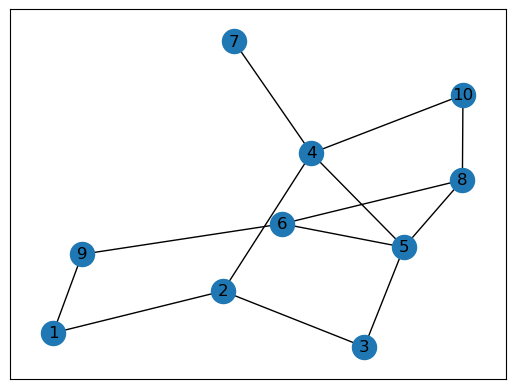

Number of nodes: 10
Number of edges: 13
Diameter: 4
Number of connected components: 1
Average degree:  2.6


In [6]:
#Create a Graph object
g1 = nx.Graph()
#Add nodes to g1
g1.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
#Add edges to g1
g1.add_edges_from([(1,2), (2,3), (3,5), (4,2), (5,4), (5,6), (7,4), (8,5), (8,6), (8,10), (9,1), (9,6), (10,4)])
#Draw
nx.draw_networkx(g1 ,with_labels=True)
plt.show()
print_properties(g1)

Now let's make an undirected graph with 100 vertices and view it's degree distribution.

It is too much to do manually, so i will use `erdos_renyi_graph(n,p)` (n is the number of node and p is the probality for edge creation) to create a random undirected graph and use spring layout and shell layout for visualizing.

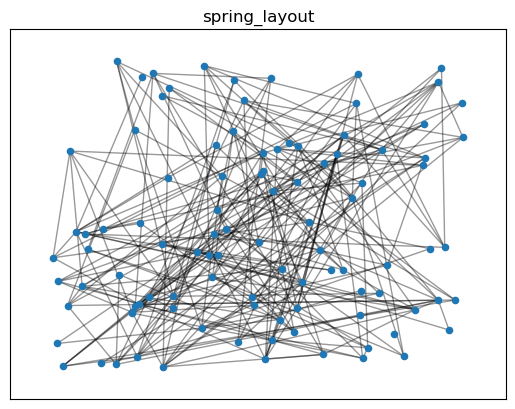

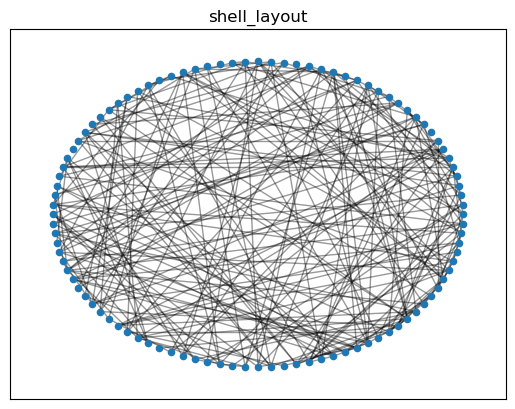

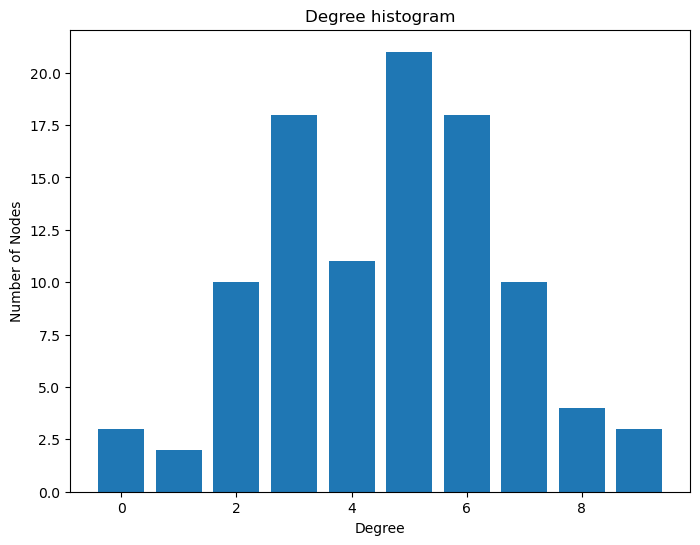

Number of nodes: 100
Number of edges: 231
Many connected components, no diameter
Number of connected components: 4
Average degree:  4.62


In [7]:
G1 = nx.erdos_renyi_graph(100, 0.05)
draw_with_layout(G1, 'spring_layout')
draw_with_layout(G1, 'shell_layout')
plot_undirected_degree_hist(G1)
print_properties(G1)

## 2. Directed Graph

A directed graph is defined as a type of graph where the edges have a direction associated with them.

Let's make a directed graph manually.
- Step 1: Create a DiGraph object.
- Step 2: Add nodes to DiGraph.
- Step 3: Add edges to DiGraph.
- Step 4: Visualzie.

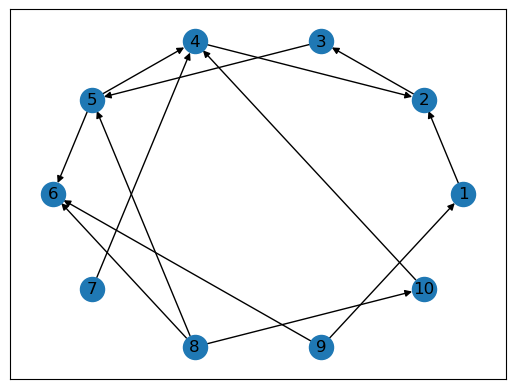

Number of nodes: 10
Number of edges: 13
Average in-degree:  1.3
Average out-degree:  1.3
Average total-degree:  2.6


In [8]:
# Create a DiGraph object
g2 = nx.DiGraph()
# Add nodes to DiGraph
g2.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
# Add edges to DiGraph
g2.add_edges_from([(1,2), (2,3), (3,5), (4,2), (5,4), (5,6), (7,4), (8,5), (8,6), (8,10), (9,1), (9,6), (10,4)])
# Visualzie
nx.draw_networkx(g2 , pos=nx.circular_layout(g2), with_labels=True)
plt.show()
print_properties(g2)

Let's make an directed graph with 75 vertices and view it's degree distribution.

I will continue using `erdos_renyi_graph(n,p)` to create a random directed graph and use kamada_kawai_layout and circular_layout for this.

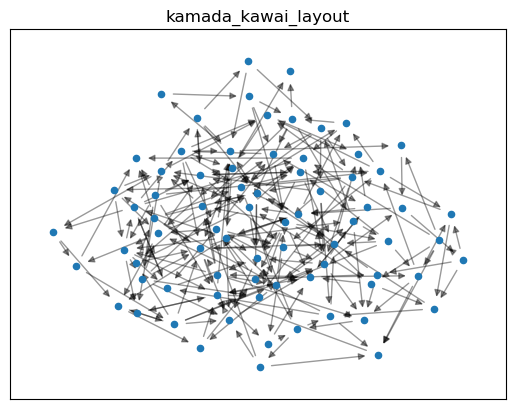

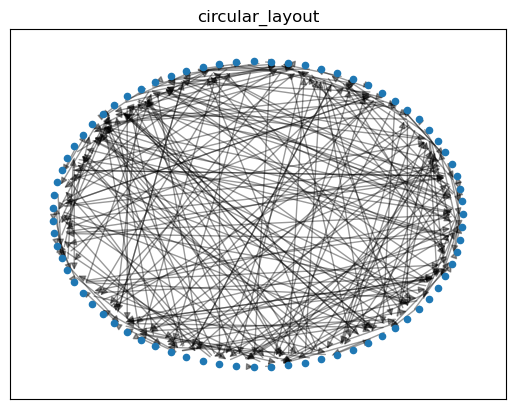

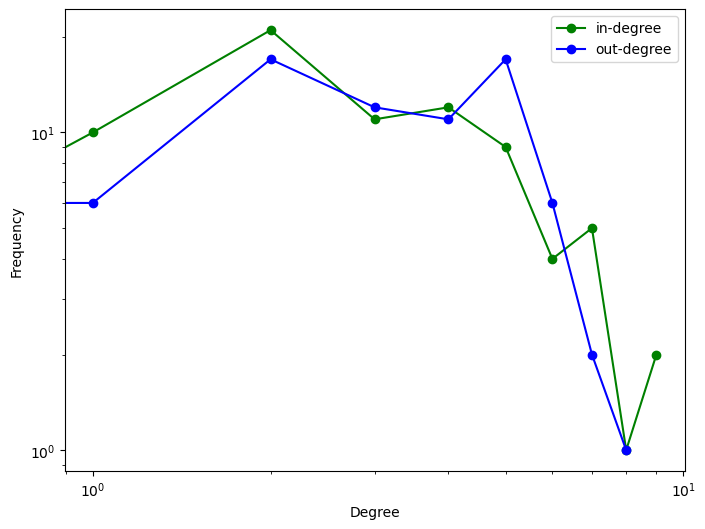

Number of nodes: 75
Number of edges: 263
Average in-degree:  3.506666666666667
Average out-degree:  3.506666666666667
Average total-degree:  7.013333333333334


In [9]:
G2 = nx.erdos_renyi_graph(75, 0.05, directed=True)
draw_with_layout(G2, 'kamada_kawai_layout')
draw_with_layout(G2, 'circular_layout')
plot_directed_degree_distribution(G2)
print_properties(G2)

## 3. Bipartite Graph

A bipartite graph is a graph in which the vertex set can be partitioned into two sets such that edges only go between sets, not within them.

Let's make a bipartite graph manually.
- Step 1: Create a Graph object.
- Step 2: Add nodes to 2 sets.
- Step 3: Add edges to Graph.
- Step 4: Visualzie.

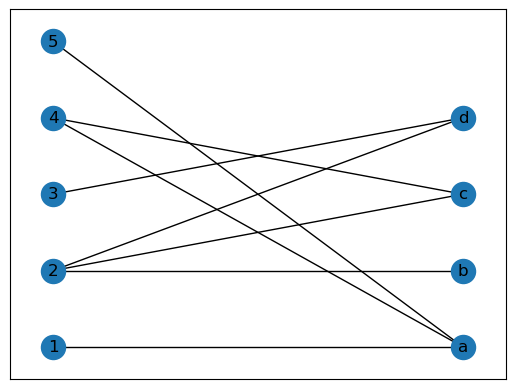

Number of nodes: 9
Number of edges: 8
Diameter: 6
Number of connected components: 1
Average degree:  1.7777777777777777


In [10]:
# Create a Graph object
g3 = nx.Graph()
# Add nodes to 2 sets
g3.add_nodes_from([1,2,3,4,5], bipartite = 0)
g3.add_nodes_from(["a","b","c","d"], bipartite = 1)
# Add edges to Graph
g3.add_edges_from([(1,"a"), (2,"b"), (2,"c"), (2,"d"), (3,"d"), (4,"a"), (4,"c"), (5,"a")])

# Visualzie
X, Y = bipartite.sets(g3)
coor = dict()
coor.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
coor.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw_networkx(g3, pos = coor, with_labels=True)
plt.show()

print_properties(g3)

Let's make an Bipartite graph with 50 vertices (30 and 20) and view it's degree distribution. I will use `random_graph` to help.

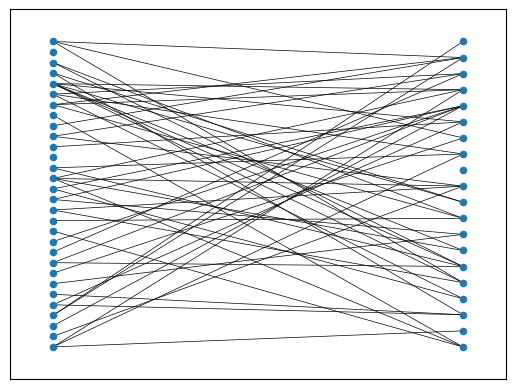

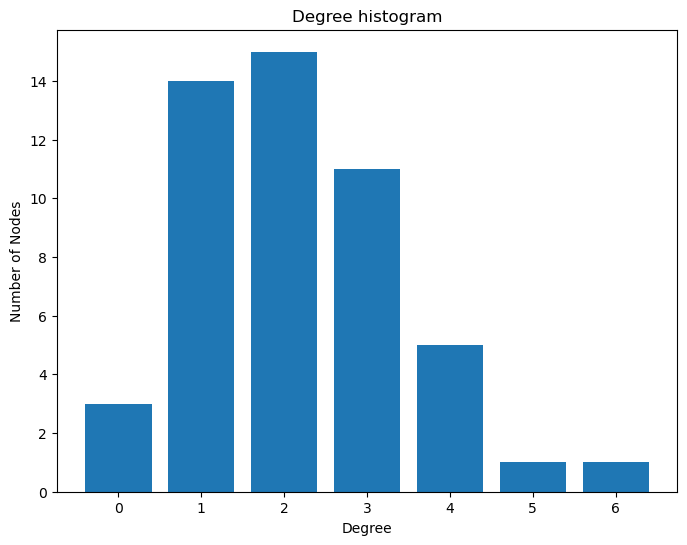

Number of nodes: 50
Number of edges: 54
Many connected components, no diameter
Number of connected components: 4
Average degree:  2.16


In [11]:
n1 = 30
n2 = 20

# Create a bipartite graph with random edges
G3 = nx.bipartite.random_graph(n1, n2, 0.1)

# Assign node attributes to distinguish the two partitions
top_nodes = {i: i for i in range(n1)}
bottom_nodes = {i+n1: i+n1 for i in range(n2)}

# Visualize
pos = nx.bipartite_layout(G3, top_nodes)
nx.draw_networkx(G3, pos, with_labels=False, node_size=20, width=0.5)

plt.show()

plot_undirected_degree_hist(G3)
print_properties(G3)

## 4. Complete Graph

A complete graph is an undirected graph in which every pair of distinct vertices is connected by a unique edge. In other words, every vertex in a complete graph is adjacent to all other vertices.

Let's make a complete graph:
- Step 1: Use `complete_graph(n)` (n is the number of nodes).
- Step 2: Visualzie.

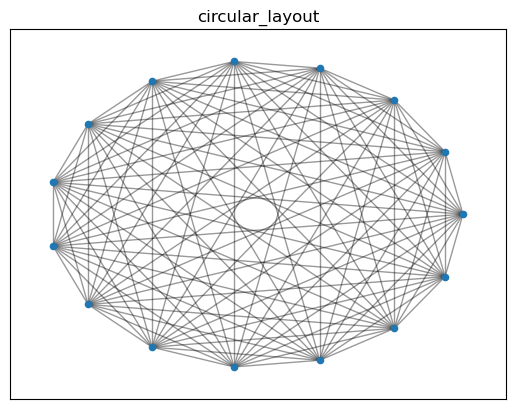

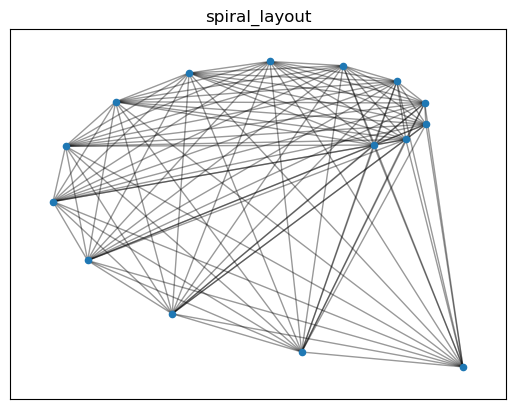

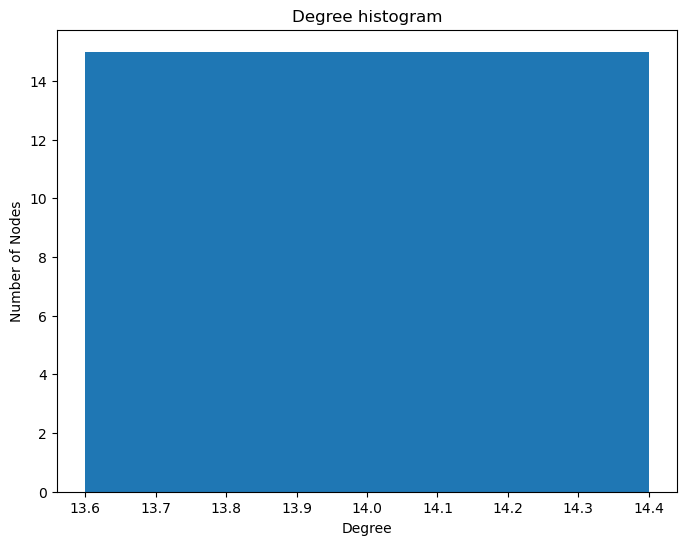

Number of nodes: 15
Number of edges: 105
Diameter: 1
Number of connected components: 1
Average degree:  14.0


In [12]:
g4 = nx.complete_graph(15)
draw_with_layout(g4, 'circular_layout')
draw_with_layout(g4, 'spiral_layout')

plt.show()

plot_undirected_degree_hist(g4)
print_properties(g4)

Because this is a complete graph, all nodes have n-1 degree (15 - 1 =14)

## 5. Weighted Graph

A weighted graph is defined as a special type of graph in which the edges are assigned some weights which represent cost, distance, and many other relative measuring units.

We will create this exactly the same as undirected graph, only add weight to each edge.

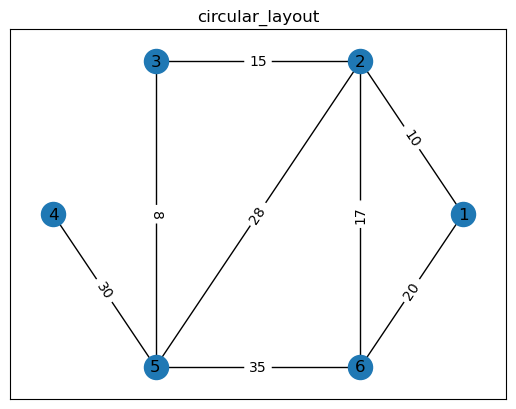

In [13]:
g5 = nx.Graph()
g5.add_nodes_from([1,2,3,4,5,6])
g5.add_weighted_edges_from([(1,2,10), (2,3,15), (2,5,28), (2,6,17), (3,5,8), (5,4,30), (5,6,35), (6,1,20)])

pos = nx.circular_layout(g5)

nx.draw_networkx(g5 ,pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(g5,pos=pos, edge_labels=nx.get_edge_attributes(g5, 'weight'))
plt.title("circular_layout")
plt.show()

- Let's try planar_layout

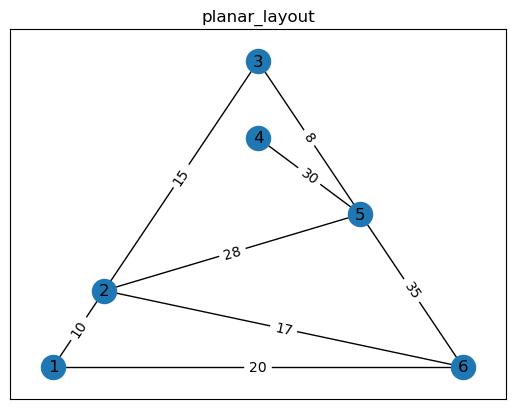

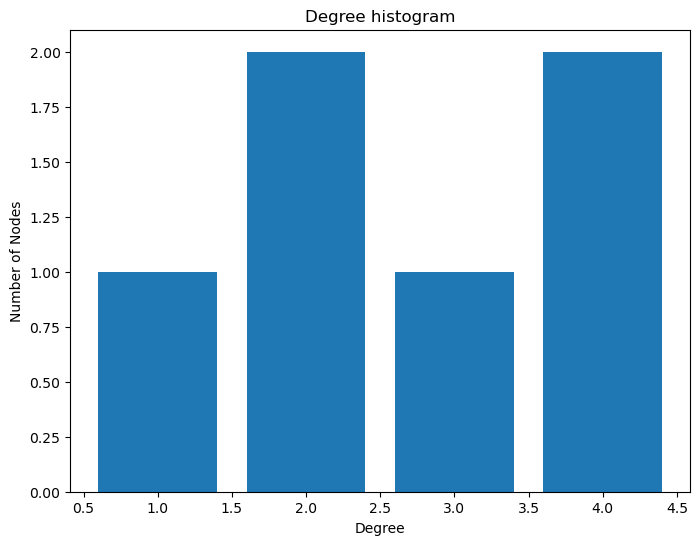

Number of nodes: 6
Number of edges: 8
Diameter: 3
Number of connected components: 1
Average degree:  2.6666666666666665


In [14]:
pos = nx.planar_layout(g5)

nx.draw_networkx(g5 ,pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(g5,pos=pos, edge_labels=nx.get_edge_attributes(g5, 'weight'))
plt.title("planar_layout")
plt.draw()
plt.show()

plot_undirected_degree_hist(g5)
print_properties(g5)

## 6. Regular Graph

A graph is called regular graph if degree of each vertex is equal.

Let's make a regular graph:
- Step 1: Use `random_regular_graph(d,n)` (d is the degree of each node and n is the number of nodes).
- Step 2: Visualzie.

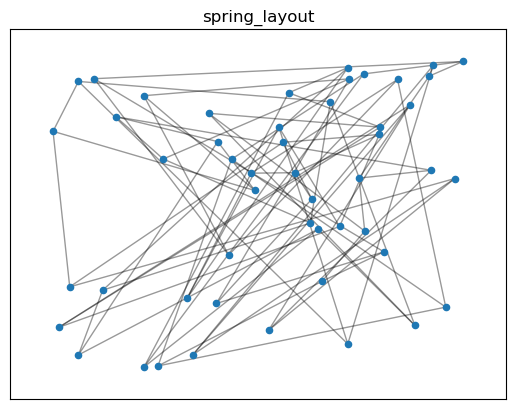

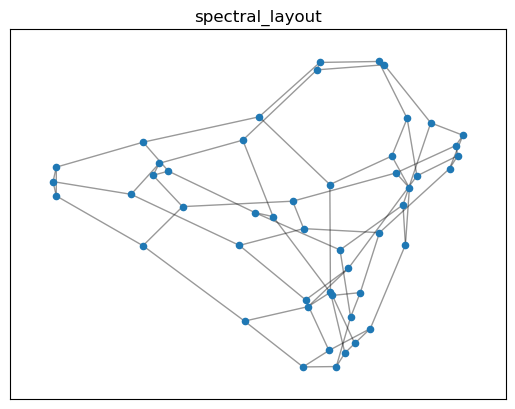

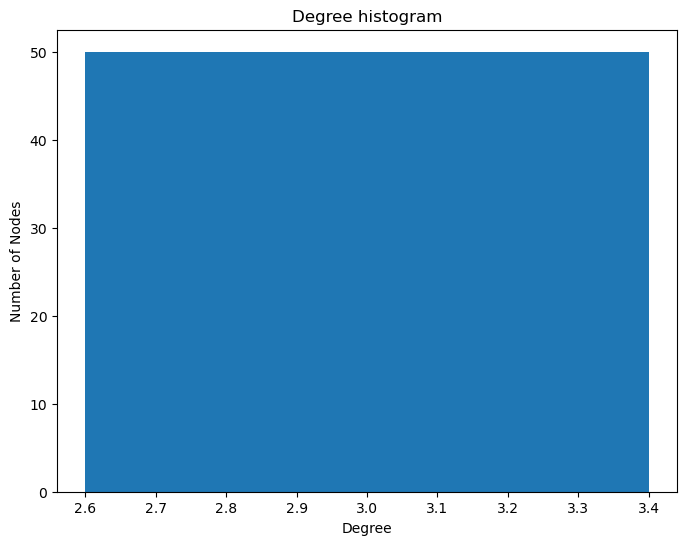

Number of nodes: 50
Number of edges: 75
Diameter: 7
Number of connected components: 1
Average degree:  3.0


In [15]:
g6 = nx.random_regular_graph(3,50)
draw_with_layout(g6, 'spring_layout')
draw_with_layout(g6, 'spectral_layout')

plt.show()

plot_undirected_degree_hist(g6)
print_properties(g6)

A regular graph is a graph in which the degree of each vertex is equal. Therefore, the degree histogram only has 3 degree.

## 7. Scale-free Graph

A graph is said to be scale-free if its features are independent of the size of the graph (the number of vertices). That is, as the graph expands, the underlying structure remains the same.

Let's make a scale-free graph manually.
- Step 1: Use `scale_free_graph(n)` (n is the number of nodes).
- Step 2: Visualzie.

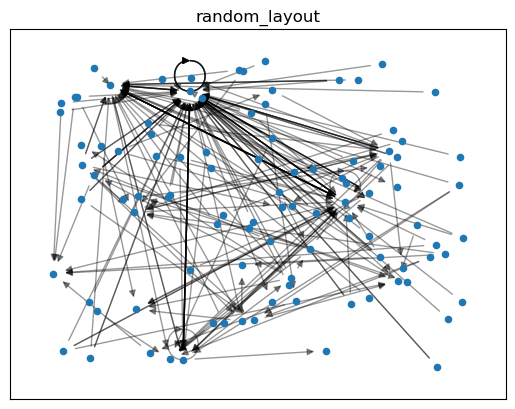

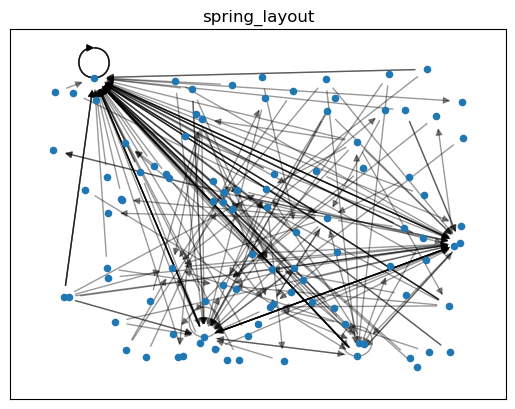

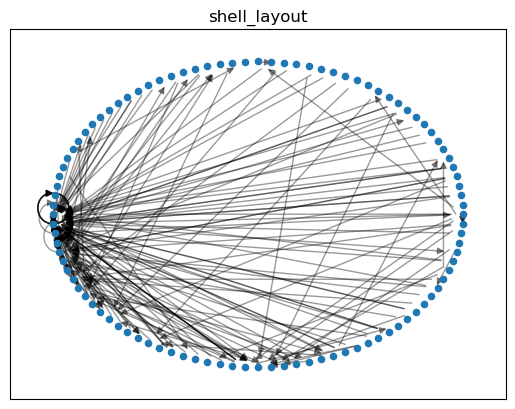

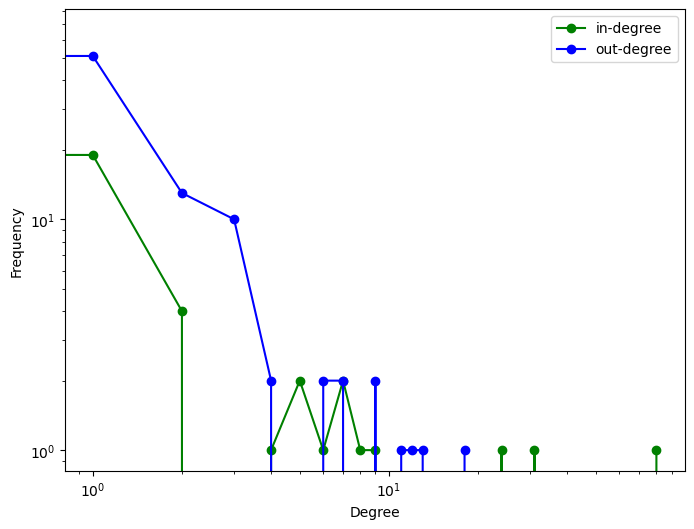

Number of nodes: 100
Number of edges: 213
Average in-degree:  2.13
Average out-degree:  2.13
Average total-degree:  4.26


In [16]:
g7 = nx.scale_free_graph(100)
draw_with_layout(g7, 'random_layout')
draw_with_layout(g7, 'spring_layout')
draw_with_layout(g7, 'shell_layout')

plot_directed_degree_distribution(g7)
print_properties(g7)

- Scale-free networks have a power law degree distribution. We can see it from the degree histogram and some nodes' dense edges of the graphs.

## 8. MultiDiGraph

It is a directed graph class that can store multiedges. Multiedges are multiple edges between two nodes. Networkx does not support visualizing parallel edges (here i can only visualize 1 and 2 parallel edges, If there are more than 2 parallel edges, they will lie on each other). So i will create it manually for visualizing.

Let's make a MultiDiGraph graph:
- Step 1: Create DiGraph object and add edges to it
- Step 2: Draw graph nodes and labels.
- Step 3: Draw straight edge (1 edge) and curved edge (2 parallel edge, opposite direction).

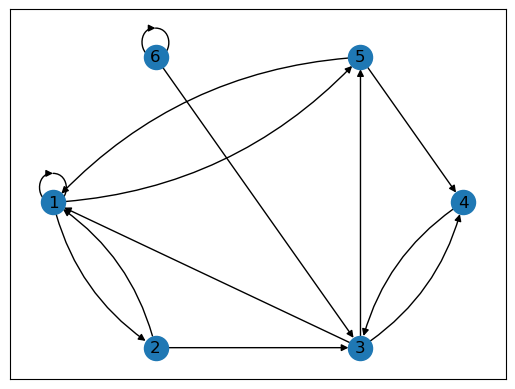

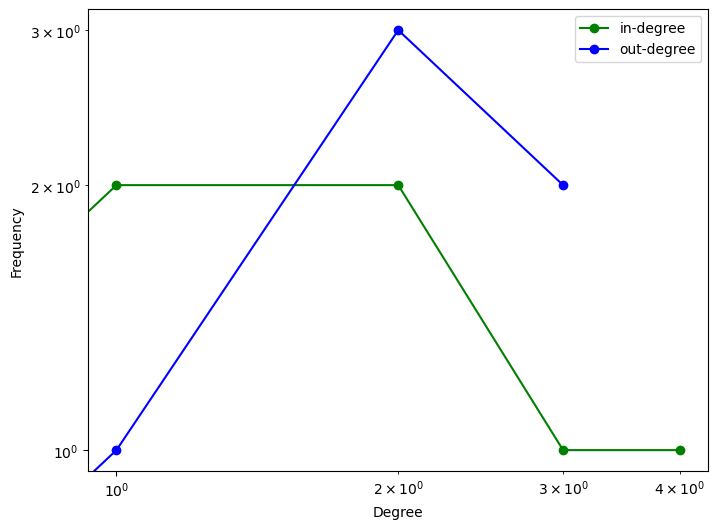

Number of nodes: 6
Number of edges: 13
Average in-degree:  2.1666666666666665
Average out-degree:  2.1666666666666665
Average total-degree:  4.333333333333333


In [17]:
g8 = nx.DiGraph()
g8.add_nodes_from([1,2,3,4,5,6])
g8.add_edges_from([(1,1),(1,2),(2,1),(2,3),(3,1),(3,4),(4,3),(1,5),(5,1),(3,5),(5,4),(6,6),(6,3)])

pos = nx.shell_layout(g8)
nx.draw_networkx_nodes(g8, pos)
nx.draw_networkx_labels(g8, pos)

curved_edges = []
for edge in g8.edges():
    if reversed(edge) in g8.edges():
        curved_edges.append(edge)
straight_edges = []
for edge in g8.edges():
    if edge not in curved_edges:
        straight_edges.append(edge)
nx.draw_networkx_edges(g8, pos, edgelist=straight_edges)
nx.draw_networkx_edges(g8, pos, edgelist=curved_edges, connectionstyle=f'arc3, rad = 0.2')
plt.show()

plot_directed_degree_distribution(g8)
print_properties(g8)

## 9. Star Graph

A Star graph is a special type of graph in which n-1 vertices have degree 1 and a single vertex have degree n – 1

Let's make a star graph:
- Step 1: Use `star_graph(n)` (range(n) is the number of nodes).
- Step 2: Visualzie.

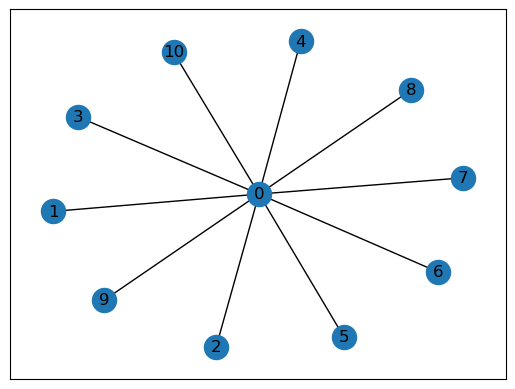

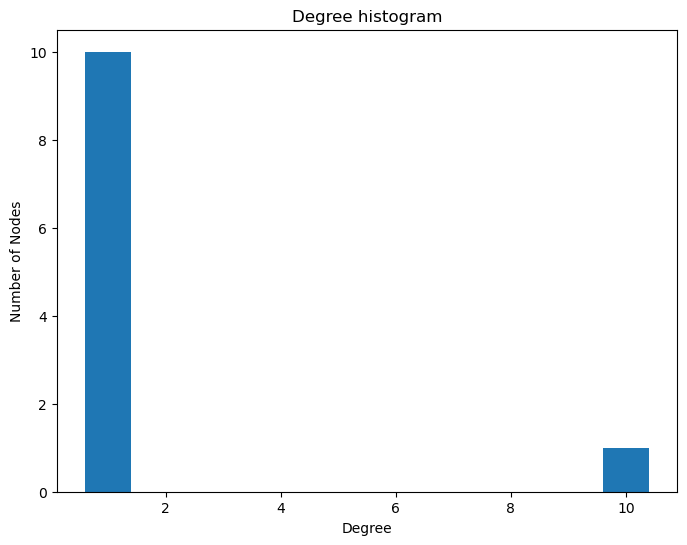

Number of nodes: 11
Number of edges: 10
Diameter: 2
Number of connected components: 1
Average degree:  1.8181818181818181


In [18]:
g9 = nx.star_graph(10)
   
nx.draw_networkx(g9)
plot_undirected_degree_hist(g9)
print_properties(g9)

- This graph has 10 degree 1 vertices and 1 degree 10 vertex 

## 10. Null Graph

A null graph is a graph in which there are no edges between its vertices. A null graph is also called empty graph.

Let's make a null graph manually.
- Step 1: Use `empty_graph(n)` (n is the number of nodes).
- Step 2: Visualzie.

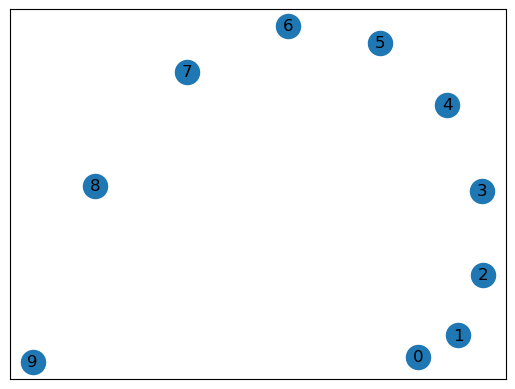

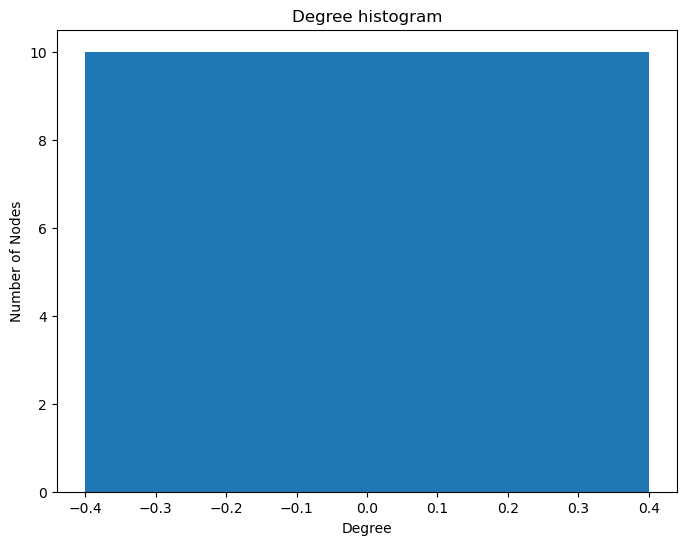

Number of nodes: 10
Number of edges: 0
Many connected components, no diameter
Number of connected components: 10
Average degree:  0.0


In [19]:
g10 = nx.empty_graph(10)
   
nx.draw_networkx(g10, pos=nx.spiral_layout(g10))
plot_undirected_degree_hist(g10)
print_properties(g10)

- There are only degree 0 vertices

---

# References

- https://networkx.org/documentation/stable/index.html
- https://www.javatpoint.com/graph-theory-types-of-graphs
- https://www.geeksforgeeks.org/basic-properties-of-a-graph/
- https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx
- https://stackoverflow.com/questions/53958700/plotting-the-degree-distribution-of-a-graph-using-nx-degree-histogram

---

<h3 align="center">THANK YOU FOR REVIEWING MY WORK</h3> 